In [1]:
import requests
import sqlite3
from collections import Counter
from concurrent import futures
import matplotlib.pyplot as plt
import wordcloud
from plot_to_cloud import FONTS
from functools import lru_cache
import logging

logging.basicConfig(level=logging.INFO)

from TMDBapi import TMDBApi

conn=sqlite3.connect("tv.db")
cur=conn.cursor()
with open("./api.key","r") as f:
    api_key=f.read()
api=TMDBApi(api_key,"zh-CN")

In [2]:
@lru_cache()

def fetch_top_ids(n):
    sql="""SELECT id FROM popularity WHERE create_at="2020-3-21" ORDER BY popularity DESC LIMIT ?"""
    cur.execute(sql,(n,))
    yield from cur

def TOPn_feq(n):
    popular_iter=api.get_popular_iter("tv")
    cur=api.get_popular_iter("tv",100)
    genre_feq=Counter()
    todo=(row["id"] for row in cur)
    with futures.ThreadPoolExecutor(8) as executor:
        result=executor.map(api.get_tv_details,todo)
    for d in result:
        genres=(item["name"] for item in d["genres"])
        genre_feq.update(genres)
    return genre_feq


In [5]:
genre_feq=TOPn_feq(100)

print(genre_feq)

INFO:root:downloading tv-1433 detail...


{'page': 1, 'total_results': 10000, 'total_pages': 500, 'results': [{'original_name': 'The Flemish Bandits', 'genre_ids': [18, 9648, 10759], 'name': 'The Flemish Bandits', 'popularity': 298.634, 'origin_country': ['BE'], 'vote_count': 51, 'first_air_date': '2020-01-02', 'backdrop_path': '/9KimY8zgzv36HFtsHFsQMhOyH9f.jpg', 'original_language': 'nl', 'id': 93533, 'vote_average': 5.9, 'overview': '', 'poster_path': '/t6k8fgzw5aWkyFgnnbTtwiFTXMD.jpg'}, {'original_name': 'Westworld', 'genre_ids': [878, 37], 'name': '西部世界', 'popularity': 240.967, 'origin_country': ['US'], 'vote_count': 2173, 'first_air_date': '2016-10-02', 'backdrop_path': '/yGNnjoIGOdQy3douq60tULY8teK.jpg', 'original_language': 'en', 'id': 63247, 'vote_average': 8.1, 'overview': '根据 1973 年的同名科幻电影改编。在遥远的未来，一座巨型高科技成人乐园建成，其中有西部世界，罗马世界，中世纪世界三大主题版块的机器人世界，它提供给游客杀戮与性欲的满足。这座巨大机械乐园的后台监控渐渐失去了对机器人的控制，游客被机器人杀死，所有想逃离者都被锁定。该剧的主题是：「人工智能获得自主意识」以及「未来世界的罪孽」。', 'poster_path': '/cxIheXzaR2YhOM9kyVHIfH56jkj.jpg'}, {'original_name': 'The Walking

Counter({'剧情': 69, '动作冒险': 30, 'Sci-Fi & Fantasy': 29, '喜剧': 26, '犯罪': 23, '悬疑': 21, '动画': 18, '奇幻': 4, '家庭': 3, '西部': 2, '科幻': 2, '动作': 2, '冒险': 2, '爱情': 2, 'War & Politics': 2, '儿童': 2, '恐怖': 1, '肥皂剧': 1, '新闻': 1})


In [4]:
api.get_details(46260,"tv")

INFO:root:downloading tv-46260 detail...


{'backdrop_path': '/iTHCRCwI810e39uy4QsByWmUN8z.jpg',
 'created_by': [],
 'episode_run_time': [25],
 'first_air_date': '2002-10-03',
 'genres': [{'id': 16, 'name': '动画'},
  {'id': 35, 'name': '喜剧'},
  {'id': 10759, 'name': '动作冒险'},
  {'id': 18, 'name': '剧情'}],
 'homepage': 'http://www.tv-tokyo.co.jp/anime/naruto2002/',
 'id': 46260,
 'in_production': False,
 'languages': ['ja'],
 'last_air_date': '2007-02-08',
 'last_episode_to_air': {'air_date': '2007-02-08',
  'episode_number': 220,
  'id': 1161638,
  'name': '第220话 出发旅行',
  'overview': '鸣人伤势十分严重，但是他还是要坚持去救我爱罗，在小樱的一再劝说下，鸣人终于同意进行简单的治疗。我爱罗已经半兽化了，所有人都在担心我爱罗的精神被守鹤控制了，另一发面，宁次发现即使是半兽化的我爱罗，还是没有复活的清明查克拉强大，这场实力悬殊的战斗要怎么打才好。关键时刻，我爱罗用自己的意志压制着守鹤，他宁愿减弱自己的战斗力，也选择用自己的力量进行战斗。加油，我爱罗！',
  'production_code': '',
  'season_number': 4,
  'show_id': 46260,
  'still_path': '/kErbglX2IHAESEWHqEDdAmMcELU.jpg',
  'vote_average': 0.0,
  'vote_count': 0},
 'name': '火影忍者',
 'next_episode_to_air': None,
 'networks': [{'name': 'TV Tokyo',
   'id': 98,
   'logo_path

In [39]:
wc = wordcloud.WordCloud(font_path=FONTS, background_color="white", width=800, height=600)
wc.generate_from_frequencies(genre_feq)

(-0.5, 799.5, 599.5, -0.5)

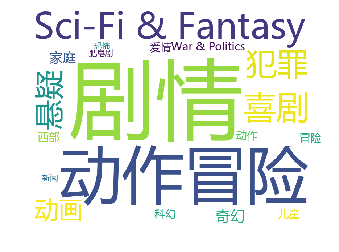

In [40]:
plt.imshow(wc)
plt.axis("off")

(-0.5, 799.5, 599.5, -0.5)

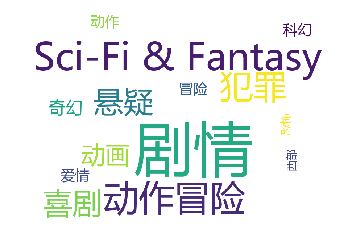

In [41]:
wc.generate_from_frequencies(TOPn_feq(50))
plt.imshow(wc)
plt.axis("off")

downloading 2316 infomation...downloading 1695 infomation...
downloading 45950 infomation...

downloading 1420 infomation...
downloading 64432 infomation...
downloading 79412 infomation...
downloading 57532 infomation...
downloading 1911 infomation...
downloading 57911 infomation...
downloading 63926 infomation...
downloading 34524 infomation...
downloading 62650 infomation...
downloading 62560 infomation...
downloading 90937 infomation...downloading 655 infomation...downloading 63210 infomation...


downloading 66840 infomation...
downloading 71790 infomation...
downloading 75219 infomation...
downloading 1400 infomation...
downloading 4604 infomation...
downloading 4629 infomation...
downloading 45790 infomation...
downloading 62286 infomation...
downloading 67116 infomation...
downloading 60574 infomation...
downloading 97539 infomation...
downloading 42009 infomation...
downloading 39852 infomation...
downloading 32692 infomation...
downloading 31917 infomation...
downloading 89247

downloading 4376 infomation...
downloading 74440 infomation...
downloading 67744 infomation...
downloading 1457 infomation...
downloading 38464 infomation...
downloading 46296 infomation...
downloading 141 infomation...
downloading 75758 infomation...
downloading 2426 infomation...
downloading 160 infomation...
downloading 88118 infomation...
downloading 91875 infomation...
downloading 45140 infomation...
downloading 60802 infomation...
downloading 1996 infomation...
downloading 45253 infomation...
downloading 1404 infomation...
downloading 66761 infomation...
downloading 80623 infomation...
downloading 92053 infomation...
downloading 607 infomation...
downloading 1516 infomation...
downloading 14929 infomation...
downloading 65494 infomation...
downloading 42671 infomation...
downloading 67117 infomation...
downloading 4656 infomation...
downloading 66676 infomation...
downloading 2093 infomation...
downloading 46880 infomation...
downloading 61662 infomation...
downloading 99477 info

(-0.5, 799.5, 599.5, -0.5)

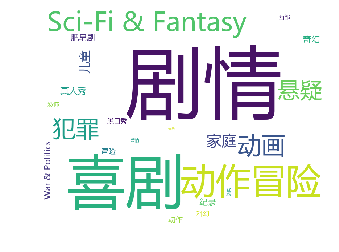

In [42]:
wc.generate_from_frequencies(TOPn_feq(500))
plt.imshow(wc)
plt.axis("off")

In [3]:
top=list(api.get_popular_iter("movie",100))

INFO:root:get popular movie at page 1...
INFO:root:get popular movie at page 2...
INFO:root:get popular movie at page 3...
INFO:root:get popular movie at page 4...
INFO:root:get popular movie at page 5...


In [8]:
edges=[]
nodes=[]
cast_history=set()
show_history=set()
from collections import namedtuple
from math import log,sqrt,pow
for show in top:
    id=show["id"]
    name=show["title"]
    if name in show_history:
        continue
    else:
        show_history.add(name)
    casts=api.get_credits(id,"movie")["cast"]
    edges.extend({"source":name,"target":cast["name"]} for cast in casts)
    nodes.append({
        "name":name,
        "category":0,
        "symbolSize":pow(int(show["popularity"])+1,0.85),
        "value":int(show["popularity"])
    })
    cast_names=set(cast["name"] for cast in casts)-cast_history
    todo=list(filter(lambda cast:cast["name"] in cast_names,casts))
    with futures.ThreadPoolExecutor(8) as executor:
        results=executor.map(api.get_person_detail,(cast["id"] for cast in todo))
    for cast,cast_info in zip(todo,results):
        cast_info=api.get_details(cast["id"],"person")
        nodes.append({
             "name":cast["name"],
            "category":1,
            "symbolSize":cast_info["popularity"],
        })
    
    cast_history=cast_history.union(cast_names)

INFO:root:downloading person-287 detail...
INFO:root:downloading person-2176 detail...
INFO:root:downloading person-17018 detail...
INFO:root:downloading person-40543 detail...
INFO:root:downloading person-882 detail...
INFO:root:downloading person-55636 detail...
INFO:root:downloading person-231 detail...
INFO:root:downloading person-11628 detail...
INFO:root:downloading person-55314 detail...
INFO:root:downloading person-9277 detail...
INFO:root:downloading person-64908 detail...
INFO:root:downloading person-83223 detail...
INFO:root:downloading person-1545016 detail...
INFO:root:downloading person-62093 detail...
INFO:root:downloading person-51754 detail...
INFO:root:downloading person-1518164 detail...
INFO:root:downloading person-1041408 detail...
INFO:root:downloading person-1754778 detail...
INFO:root:downloading person-101165 detail...
INFO:root:downloading person-1497921 detail...
INFO:root:downloading person-2422160 detail...
INFO:root:downloading person-19262 detail...
INFO:

INFO:root:downloading person-71535 detail...
INFO:root:downloading person-571309 detail...
INFO:root:downloading person-52938 detail...
INFO:root:downloading person-1814387 detail...
INFO:root:downloading person-127387 detail...
INFO:root:downloading person-81663 detail...
INFO:root:downloading person-2487737 detail...
INFO:root:downloading person-1510640 detail...
INFO:root:downloading person-1729808 detail...
INFO:root:downloading person-95639 detail...
INFO:root:downloading person-15762 detail...
INFO:root:downloading person-60279 detail...
INFO:root:downloading person-19506 detail...
INFO:root:downloading person-156689 detail...
INFO:root:downloading person-1372 detail...
INFO:root:downloading person-223879 detail...
INFO:root:downloading person-46362 detail...
INFO:root:downloading person-998387 detail...
INFO:root:downloading person-2541475 detail...
INFO:root:downloading person-1315036 detail...
INFO:root:downloading person-1023139 detail...
INFO:root:downloading person-4 detail

INFO:root:downloading person-529 detail...
INFO:root:downloading person-20286 detail...
INFO:root:downloading person-209326 detail...
INFO:root:downloading person-66441 detail...
INFO:root:downloading person-1472892 detail...
INFO:root:downloading person-1716711 detail...
INFO:root:downloading person-1181327 detail...
INFO:root:downloading person-2436897 detail...
INFO:root:downloading person-1838215 detail...
INFO:root:downloading person-207818 detail...
INFO:root:downloading person-1288410 detail...
INFO:root:downloading person-1654627 detail...
INFO:root:downloading person-1541472 detail...
INFO:root:downloading person-1261817 detail...
INFO:root:downloading person-32798 detail...
INFO:root:downloading person-83860 detail...
INFO:root:downloading person-1344344 detail...
INFO:root:downloading person-76068 detail...
INFO:root:downloading person-1539693 detail...
INFO:root:downloading person-551020 detail...
INFO:root:downloading person-1275904 detail...
INFO:root:downloading person-1

ConnectionError: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))

In [5]:
edges

[{'source': '星际探索', 'target': 'Brad Pitt'},
 {'source': '星际探索', 'target': 'Tommy Lee Jones'},
 {'source': '星际探索', 'target': 'Ruth Negga'},
 {'source': '星际探索', 'target': 'John Ortiz'},
 {'source': '星际探索', 'target': 'Liv Tyler'},
 {'source': '星际探索', 'target': 'Donald Sutherland'},
 {'source': '星际探索', 'target': 'Greg Bryk'},
 {'source': '星际探索', 'target': 'Loren Dean'},
 {'source': '星际探索', 'target': 'Kimberly Elise'},
 {'source': '星际探索', 'target': 'John Finn'},
 {'source': '星际探索', 'target': 'LisaGay Hamilton'},
 {'source': '星际探索', 'target': 'Donnie Keshawarz'},
 {'source': '星际探索', 'target': 'Bobby Nish'},
 {'source': '星际探索', 'target': 'Sean Blakemore'},
 {'source': '星际探索', 'target': 'Freda Foh Shen'},
 {'source': '星际探索', 'target': 'Kayla Adams'},
 {'source': '星际探索', 'target': 'Ravi Kapoor'},
 {'source': '星际探索', 'target': 'Elisa Perry'},
 {'source': '星际探索', 'target': 'Daniel Sauli'},
 {'source': '星际探索', 'target': 'Kimmy Shields'},
 {'source': '星际探索', 'target': 'Kunal Dudheker'},
 {'source':

In [7]:
nodes

[{'name': '星际探索',
  'category': 0,
  'symbolSize': 235.0409887161549,
  'value': 615},
 {'name': '星球大战9：天行者崛起',
  'category': 0,
  'symbolSize': 158.32675847373966,
  'value': 386},
 {'name': '喋血战士',
  'category': 0,
  'symbolSize': 123.16395165929202,
  'value': 287},
 {'name': '隐形人',
  'category': 0,
  'symbolSize': 106.60199504915188,
  'value': 242},
 {'name': '刺猬索尼克',
  'category': 0,
  'symbolSize': 106.22899214141626,
  'value': 241},
 {'name': '勇敢者游戏2：再战巅峰',
  'category': 0,
  'symbolSize': 110.31954017984498,
  'value': 252},
 {'name': '传染病', 'category': 0, 'symbolSize': 99.47428256539031, 'value': 223},
 {'name': '纽约的一个雨天',
  'category': 0,
  'symbolSize': 107.71962703082183,
  'value': 245},
 {'name': '冰雪奇缘2',
  'category': 0,
  'symbolSize': 86.48495440862494,
  'value': 189},
 {'name': '1917',
  'category': 0,
  'symbolSize': 77.10665706543409,
  'value': 165},
 {'name': '小丑', 'category': 0, 'symbolSize': 81.42865781736712, 'value': 176},
 {'name': '哈莉·奎因：猛禽小队',
  'categor

In [175]:
categories=[
    {"name":"电影","symbol":"circle"},
    {"name":"演员","symbol":"rect"}
]

In [176]:
history=set()
for node in nodes:
    if node["name"] not in history:
        history.add(node["name"])
    else:
        print(node["name"])

In [177]:
from pyecharts import options as opts
from pyecharts.charts import Graph

In [178]:
c = (
    Graph(init_opts=opts.InitOpts(width="1000px", height="600px"))
    .add(
        "",
        nodes=nodes,
        links=edges,
        categories=categories,
        layout="force",
        repulsion=80
    )
    .render("movies.html")
)